<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/0914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.5
8.0
11.5
7.0
22.0
-6.0
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


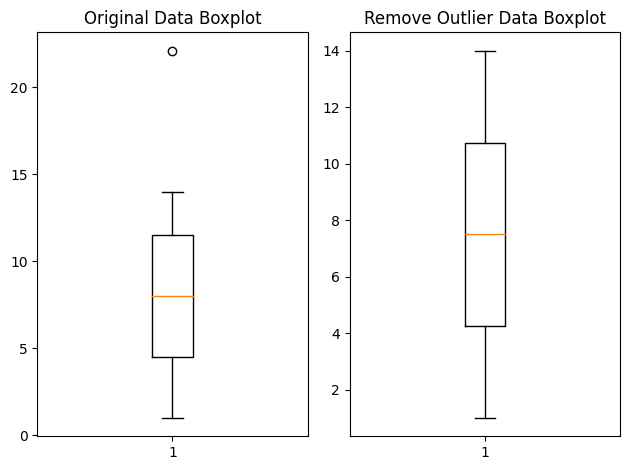

In [1]:
# 이상치

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

fig = plt.figure() # figure(도화지)

fig_1 = fig.add_subplot(1, 2, 1)  # 1행 2열중에 1번째로 추가
fig_2 = fig.add_subplot(1, 2, 2)  # 1행 2열중에 2번째로 추가

fig_1.set_title('Original Data Boxplot')
fig_1.boxplot(data)

# numpy를 이용하여 사분위값 구하기
print(np.percentile(data, 25)) # 1사분위값 => 4.5
print(np.percentile(data, 50)) # 2사분위값(중위값) => 8.0
print(np.percentile(data, 75)) # 3사분위값(중위값) => 11.5

# IQR value = 3사분위값 - 1사분위값

iqr_value = np.percentile(data, 75) - np.percentile(data, 25)
print(iqr_value) # 7.0

upper_fence = np.percentile(data, 75) + iqr_value * 1.5
lower_fence = np.percentile(data, 25) - iqr_value * 1.5

print(upper_fence) # 22.0
print(lower_fence) # -6.0

# numpydml boolean index를 사용해서 알아내는 방법
print(data[(data <= upper_fence) & (data >= lower_fence)])

# 이상치를 제외한 나머지 정상적인 데이터 구하기
result_data = data[(data <= upper_fence) & (data >= lower_fence)]

fig_2.set_title('Remove Outlier Data Boxplot')
fig_2.boxplot(result_data)

fig.tight_layout()

plt.show()

In [2]:
# z-score를 활용해 이상치 제거
# 이 방법이 더 간단하지만 코드 외우고 이해 필요
from scipy import stats

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 1.8 # zscore outliers 임계값 (2.0이하가 optimal)

# outliers 출력.
outliers = data[(np.abs(stats.zscore(data)) > zscore_threshold)]
print(outliers)    # [22.1]

# 이상치 제거한 결과
print(data[np.isin(data,outliers, invert=True)]) # boolean indexing을 이용해서 원하는 값 도출
# [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]

[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [11]:
# Simple Linear Regression 마지막 예제(온도에 따른 Ozone량 예측)
# 데이터 전처리 포함(결측치, 이상치, 정규화)

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model # sklearn의 LinearRegression 모델을 생성하기 위해 필요
from sklearn.preprocessing import MinMaxScaler  # 정규화를 위채 필요

from scipy import stats   # Z-score 방식으로 이상치 검출, 제거하기 위해 필요

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD


In [12]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/ozone.csv')
display(df) # 153 rows × 6 columns

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [13]:
# 데이터 전처리(Data Preprocessing)
# 1. 결측치 처리 - 삭제
# 2. 이상치 처리 - 삭제
# 3. 정규화(MixMaxScaler)

training_data = df[['Temp', 'Ozone']]
# display(training_data)

# 결측치 처리 - 삭제
training_data = training_data.dropna(how = 'any')
# display(training_data) # 116 rows × 2 columns

# 이상치 처리 - 삭제
zscore_threshold = 1.8

outliers = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
# print(outliers)
training_data = training_data.loc[~training_data['Ozone'].isin(outliers)]
# print(training_data)

# 정규화
x_data = training_data['Temp'].values.reshape(-1, 1) # 2차원으로 변경
t_data = training_data['Ozone'].values.reshape(-1, 1) # 2차원으로 병경

scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

In [14]:
# sklearn을 이용해서 모델 구현하고 예측까지 수행

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data, t_data)

sklearn_predict = sklearn_model.predict([[62]])
print(sklearn_predict)  # [[4.51299041]]


[[4.51299041]]


In [20]:
# Tensorflow Keras를 이용한 모델 구현하고 예측까지 수행

keras_model = Sequential()

keras_model.add(Flatten(input_shape = (3, )))

output_layer = Dense(units = 1, activation = 'linear')
keras_model.add(output_layer)

keras_model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')

keras_model.fit(x_data_norm, t_data_norm, epochs = 2000, verbose = 0)

predict_data = np.array([[62]])
predict_data_norm = scaler_x.transform(predict_data)
result_norm = keras_model.predict(predict_data_norm)

result = scaler_t.inverse_transform(result_norm)
print(result) # [[4.4237533]]


1/1 [==============================] - 0s 45ms/step
[[4.4237533]]


In [26]:
# Multiple Linear Regression(다중 선형 회기)

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model # sklearn의 LinearRegression 모델을 생성하기 위해 필요
from sklearn.preprocessing import MinMaxScaler  # 정규화를 위채 필요

from scipy import stats   # Z-score 방식으로 이상치 검출, 제거하기 위해 필요

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/ozone.csv')
# display(df) # 153 rows × 6 columns

# 데이터 전처리(Data Preprocessing)
# 1. 결측치 처리 - 삭제
# 2. 이상치 처리 - 삭제
# 3. 정규화(MixMaxScaler)

training_data = df[['Temp', 'Wind', 'Solar.R', 'Ozone']]
# display(training_data)

# 결측치 처리 - 삭제
training_data = training_data.dropna(how = 'any')
# display(training_data) # 116 rows × 2 columns

# 이상치 처리 - 삭제
zscore_threshold = 1.8

outliers = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
# print(outliers)
training_data = training_data.loc[~training_data['Ozone'].isin(outliers)]
# print(training_data)

# 정규화
x_data = training_data[['Temp', 'Wind', 'Solar.R']].values # 2차원으로 변경 Fency indexing 형식
t_data = training_data['Ozone'].values.reshape(-1, 1) # 2차원으로 병경

scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [24]:
# sklearn을 이용해서 모델 구현하고 예측까지 수행

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data, t_data)

sklearn_predict = sklearn_model.predict([[80.0, 10.0, 150.0]])
print(sklearn_predict)  # [[40.34973385]]

[[40.34973385]]


In [27]:
# Tensorflow Keras를 이용한 모델 구현하고 예측까지 수행

keras_model = Sequential()

keras_model.add(Flatten(input_shape = (3, )))

output_layer = Dense(units = 1, activation = 'linear')
keras_model.add(output_layer)

keras_model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')

keras_model.fit(x_data_norm, t_data_norm, epochs = 2000, verbose = 0)

predict_data = np.array([[80.0, 10.0, 150.0]])
predict_data_norm = scaler_x.transform(predict_data)
result_norm = keras_model.predict(predict_data_norm)

result = scaler_t.inverse_transform(result_norm)
print(result) # [[39.979942]]

1/1 [==============================] - 0s 51ms/step
[[39.979942]]


In [28]:
! pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.2 MB/s eta 0:00:00


<function matplotlib.pyplot.show(close=None, block=None)>

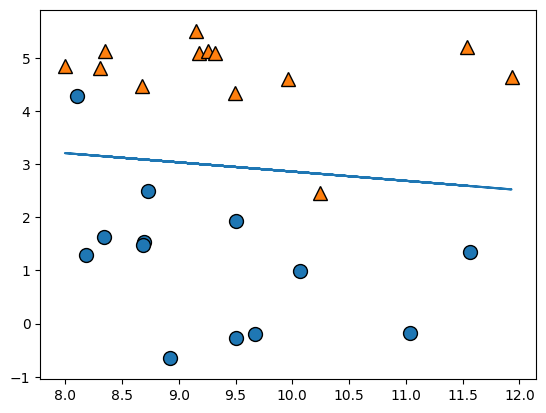

In [35]:
import numpy as np
from sklearn import linear_model
import mglearn # dataset을 가져오기 위해 사용하는 utility module
import matplotlib.pyplot as plt

# Training Data Set
x, y = mglearn.datasets.make_forge()
# print(x)
# print(y)

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

model = linear_model.LinearRegression()
model.fit(x[:, 0].reshape(-1, 1), x[:, 1].reshape(-1, 1))

plt.plot(x[:, 0], x[:, 0] * model.coef_.ravel() + model.intercept_)
plt.show